# Gerador aux relatório

In [1]:
#files = ['pr1002']
files = ['a280', 'berlin52', 'eil101', 'tsp225', 'pr1002']
#files = ['a280', 'berlin52', 'eli101', 'tsp225', 'pr1002', 'd18512']

enable_mst = True
enable_tour = False
percentage_delta = 0.01

In [2]:
%%capture

!make clean
!make

In [3]:
from os import system

for file in files:
    file_path = f'exemplos/in/{file}.tsp'
    print(f'Running {file_path}')
    system(f'./trab1 {file_path}')

print('Done')

Running exemplos/in/pr1002.tsp
Done


In [4]:
%%capture

# Plot dos exemplos no Jupyter Notebook já que o vadio o vadio do Jheam, que usa WSL,
# não tem backend de GUI pra plotar imagens

import tsp_plot
import matplotlib.pyplot as plt

has_diffs = []
for file in files:
    diff = tsp_plot.produce_diff(f'exemplos/in/{file}.tsp', f'exemplos/mst/{file}.mst' if enable_mst else '', f'{file}.mst', f'exemplos/tour/{file}.tour' if enable_tour else '', f'{file}.tour', percentage_delta)
    has_diffs.append(diff)

diffs = list(zip(files, has_diffs))

MST TESTS
pr1002: FAIL


<Figure size 640x480 with 0 Axes>

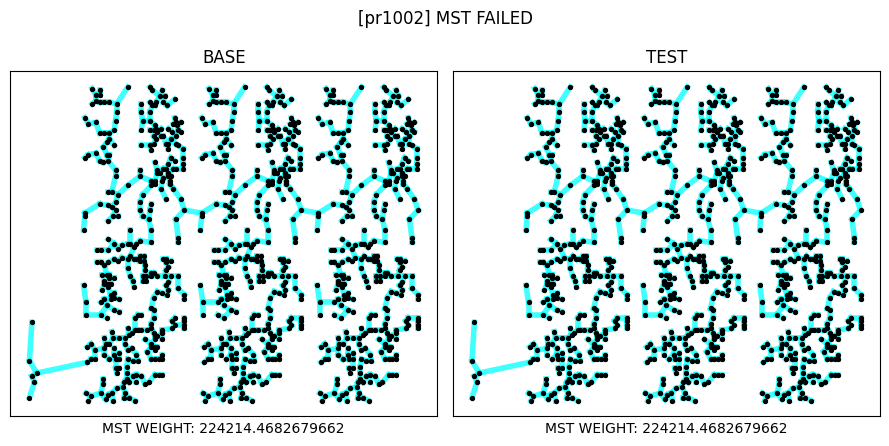

In [5]:
# MST TESTS

import tsp_plot

if enable_mst:
    print('MST TESTS')
    for file, has_diff in diffs:
        print(f'{file}: {"OK" if not has_diff else "FAIL"}')

    for file, has_diff in diffs:
        if not has_diff:
            continue
        tsp_plot.produce_diff(f'exemplos/in/{file}.tsp', f'exemplos/mst/{file}.mst' if enable_mst else '', f'{file}.mst', '', '', percentage_delta)
else:
    print('MST TESTS SKIPPED')

In [6]:
# TOUR TESTS

import tsp_plot

if enable_tour:
    print('TOUR TESTS')
    for file, has_diff in diffs:
        print(f'{file}: {"OK" if not has_diff else "FAIL"}')

    for file, has_diff in diffs:
        if not has_diff:
            continue
        tsp_plot.produce_diff(f'exemplos/in/{file}.tsp', '', '', f'exemplos/tour/{file}.tour' if enable_tour else '', f'{file}.tour', percentage_delta)
else:
    print('TOUR TESTS SKIPPED')

TOUR TESTS SKIPPED


In [7]:
import os
import tsp_plot

dir = 'exemplos/my'
for filename in os.listdir(dir):
    tsp_plot.produce_final(f'{dir}/{filename}', '', '')
    os.remove(f'{dir}/{filename}')